In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from datetime import datetime 

In [64]:
monday = pd.read_csv('/Users/hakangurler/Desktop/8_Week/monday.csv', sep=";")
tuesday = pd.read_csv('/Users/hakangurler/Desktop/8_Week/tuesday.csv', sep=";")
wednesday = pd.read_csv('/Users/hakangurler/Desktop/8_Week/wednesday.csv', sep=";")
thursday = pd.read_csv('/Users/hakangurler/Desktop/8_Week/thursday.csv', sep=";")
friday = pd.read_csv('/Users/hakangurler/Desktop/8_Week/friday.csv', sep=";")

monday["weekday"] = "monday"
tuesday["weekday"] = "tuesday"
wednesday["weekday"] = "wednesday"
thursday["weekday"] = "thursday"
friday["weekday"] = "friday"

# Create a dataframe with all days
df = monday.append(tuesday, ignore_index=True)
df = df.append(wednesday, ignore_index=True)
df = df.append(thursday, ignore_index=True)
df = df.append(friday, ignore_index=True)

# Extract the hour from the timestamp
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hour"] = df["timestamp"].dt.hour
df["time"] = df["timestamp"].dt.time

In [65]:
data = pd.read_csv('/Users/hakangurler/Desktop/8_Week/tuesday.csv', header=0, sep=";", parse_dates=True)
data.head()

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
1,2019-09-03 07:02:00,2,drinks
2,2019-09-03 07:03:00,3,dairy
3,2019-09-03 07:05:00,1,drinks
4,2019-09-03 07:06:00,4,dairy


In [66]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.dtypes 

timestamp      datetime64[ns]
customer_no             int64
location               object
dtype: object

In [67]:
data.tail()

,timestamp,customer_no,location
4709,2019-09-03 21:47:00,1421,drinks
4710,2019-09-03 21:47:00,1422,dairy
4711,2019-09-03 21:48:00,1421,checkout
4712,2019-09-03 21:49:00,1412,checkout
4713,2019-09-03 21:50:00,1411,dairy


In [68]:
checkout=set(data[data["location"]=="checkout"]["customer_no"].unique())
all_c=set(data["customer_no"].unique())
diff=all_c.difference(checkout)
for cust in diff:
    data=data.append({"timestamp":"2019-09-03 21:50:00","customer_no":cust,
    "location":"checkout"}, ignore_index=True)


data[data["timestamp"]=="2019-09-03 21:50:00"]

,timestamp,customer_no,location
4714,2019-09-03 21:50:00,1411,checkout
4715,2019-09-03 21:50:00,1422,checkout


In [69]:
df["customer_no"].nunique() 

1535

In [70]:
data["customer_no"]=data["customer_no"].apply(lambda x: str(x)+'_tuesday')
data["customer_no"]

0          1_tuesday
1          2_tuesday
2          3_tuesday
3          1_tuesday
4          4_tuesday
            ...     
4711    1421_tuesday
4712    1412_tuesday
4713    1411_tuesday
4714    1411_tuesday
4715    1422_tuesday
Name: customer_no, Length: 4716, dtype: object

In [71]:
pip install plotly_express==0.4.0 

Note: you may need to restart the kernel to use updated packages.


In [72]:
import plotly.express as px 

In [73]:
total_customers_section = pd.DataFrame(df.groupby("location")["customer_no"].nunique())
total_customers_section.reset_index(inplace=True)
px.bar(total_customers_section, x='location', y='customer_no') 

Text(0.5, 1.0, 'Customer distribution by location')

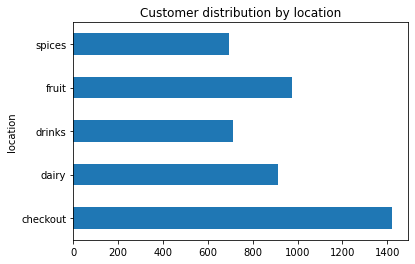

In [74]:
data.groupby(["location"])['customer_no'].count().plot.barh()
plt.title("Customer distribution by location") 

Text(0.5, 1.0, 'Percentage of customers per section')

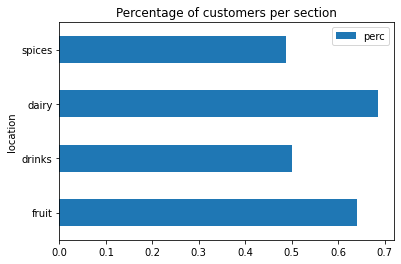

In [75]:
cust_per_aile=data[data['location']!="checkout"].groupby(["location"])['customer_no'].count()
cust_total=data[data['location']=="checkout"].groupby(["location"])['customer_no'].count()
perc_cust=pd.to_numeric(cust_per_aile.values)/pd.to_numeric(cust_total.values)
p=pd.concat([pd.DataFrame(perc_cust),pd.DataFrame(pd.unique(data['location'][data['location']!="checkout"]))], axis=1)
p.columns=["perc",'location']
p.set_index("location", inplace=True)
p.plot.barh()
plt.title("Percentage of customers per section") 

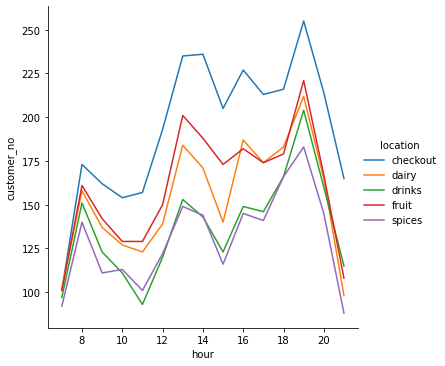

In [76]:
total_customers_time = pd.DataFrame(df.groupby(["location","hour"])["customer_no"].nunique())
total_customers_time.reset_index(inplace=True)
sns.relplot(x="hour", y="customer_no", hue="location", kind="line", data=total_customers_time) 

In [81]:
def missing_checkout(data):
    checkout=set(data[data["location"]=="checkout"]["customer_no"].unique())
    all_c=set(data["customer_no"].unique())
    diff=all_c.difference(checkout)
    for cust in diff:
        data=data.append({"timestamp":"2019-09-02 22:00:00","customer_no":cust,
        "location":"checkout"}, ignore_index=True)

    return data

def cust_no_name(data, weekday):
    data["customer_no"]=data["customer_no"].apply(lambda x: str(x)+"_"+ weekday)
    return data

In [82]:
monday=pd.read_csv('/Users/hakangurler/Desktop/8_Week/monday.csv', header=0, sep=";", parse_dates=True)
missing_checkout(monday)
monday["weekday"]="monday"
cust_no_name(monday,"monday")

tuesday=pd.read_csv('/Users/hakangurler/Desktop/8_Week/tuesday.csv', header=0, sep=";", parse_dates=True)
missing_checkout(tuesday)
tuesday["weekday"]="tuesday"
cust_no_name(tuesday,"tuesday")

wednesday=pd.read_csv('/Users/hakangurler/Desktop/8_Week/wednesday.csv', header=0, sep=";", parse_dates=True)
missing_checkout(wednesday)
wednesday["weekday"]="wednesday"
cust_no_name(wednesday,"wednesday")

thursday=pd.read_csv('/Users/hakangurler/Desktop/8_Week/thursday.csv', header=0, sep=";", parse_dates=True)
missing_checkout(thursday)
thursday["weekday"]="thursday"
cust_no_name(thursday,"thursday")

friday=pd.read_csv('/Users/hakangurler/Desktop/8_Week/friday.csv', header=0, sep=";", parse_dates=True)
missing_checkout(friday)
friday["weekday"]="friday"
cust_no_name(friday,"friday")

data=pd.concat([monday,tuesday,wednesday,thursday, friday])
data["timestamp"]=pd.to_datetime(data["timestamp"])
data.set_index("timestamp",inplace=True)
data

,customer_no,location,weekday
timestamp,,,
2019-09-02 07:03:00,1_monday,dairy,monday
2019-09-02 07:03:00,2_monday,dairy,monday
2019-09-02 07:04:00,3_monday,dairy,monday
2019-09-02 07:04:00,4_monday,dairy,monday
2019-09-02 07:04:00,5_monday,spices,monday
...,...,...,...
2019-09-06 21:50:00,1500_friday,dairy,friday
2019-09-06 21:50:00,1507_friday,checkout,friday
2019-09-06 21:50:00,1508_friday,checkout,friday


In [83]:
df["customer_no"].nunique() 

1535

In [84]:
daily_customers = pd.DataFrame(df.groupby("weekday")["customer_no"].nunique())
daily_customers.reset_index(inplace=True)
px.bar(daily_customers, x='weekday', y='customer_no') 

In [85]:
total_customers_section = pd.DataFrame(df.groupby("location")["customer_no"].nunique())
total_customers_section.reset_index(inplace=True)
px.bar(total_customers_section, x='location', y='customer_no') 

<AxesSubplot:xlabel='hour'>

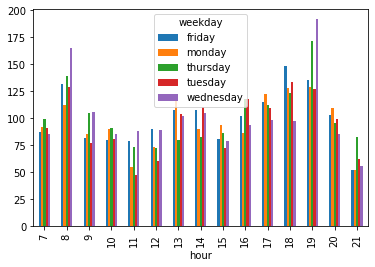

In [86]:
data["hour"]=data.index.hour
data[data["location"] =="checkout"].groupby(["hour","weekday"]).nunique()["customer_no"].unstack().plot.bar()  

<AxesSubplot:xlabel='location'>

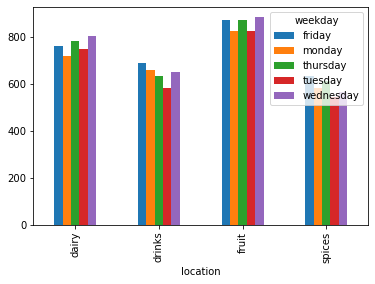

In [87]:
data[data["location"] !="checkout"].groupby(["location","weekday"]).nunique()["customer_no"].groupby(["location","weekday"]).mean().unstack().plot.bar() 

<AxesSubplot:xlabel='hour', ylabel='customer_no'>

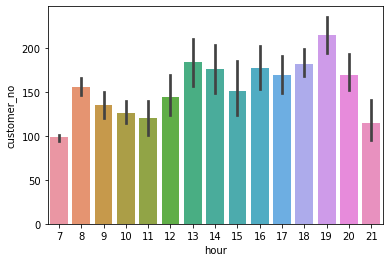

In [88]:
sns.barplot(data=total_customers_time, y='customer_no', x='hour', orient='v') 

<AxesSubplot:xlabel='hour', ylabel='customer_no'>

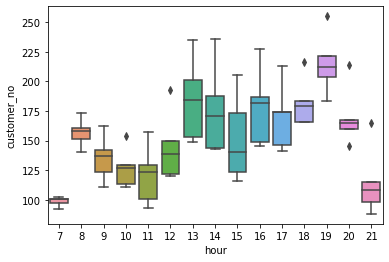

In [89]:
sns.boxplot(data=total_customers_time, y='customer_no', x='hour', orient='v') 

<AxesSubplot:xlabel='hour'>

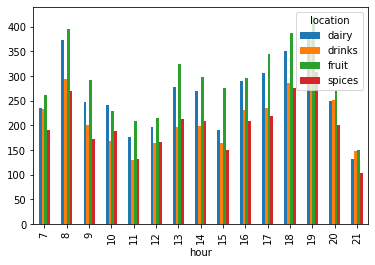

In [90]:
data["hour"]=data.index.hour
data[data["location"] !="checkout"].groupby(["hour","location"]).nunique()["customer_no"].groupby(["hour","location"]).mean().unstack().plot.bar() 

In [91]:
px.bar(total_customers_time, x='hour', y='customer_no', color="location") 

In [92]:
px.line(total_customers_time, x="hour", y="customer_no", color="location", hover_name="location",line_shape="spline") 